You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

**1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.style
plt.style.use('classic')
from sklearn import metrics

In [2]:
data = pd.read_csv('cubic_zirconia.csv')
data.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [3]:
data = data.drop('Unnamed: 0',axis = 1)

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data.shape

(26967, 10)

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [7]:
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [8]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
data.isnull().sum()/data.isnull().sum().sum()*100

carat        0.0
cut          0.0
color        0.0
clarity      0.0
depth      100.0
table        0.0
x            0.0
y            0.0
z            0.0
price        0.0
dtype: float64

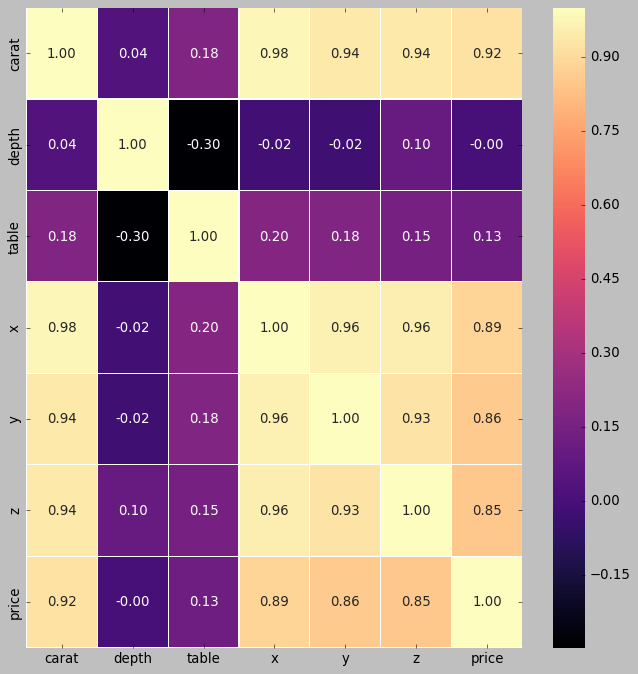

In [10]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

In [11]:
for column in data.columns:
    if data[column].dtype != 'object':
        median = data[column].median()
        data[column] = data[column].fillna(median)    
        
data.isnull().sum()     

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [13]:
df = pd.get_dummies(data, columns=['cut','color','clarity'],drop_first=True)

In [14]:
df.head(20)

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,1.02,61.5,56.0,6.46,6.49,3.99,9502,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,1.01,63.7,60.0,6.35,6.30,4.03,4836,1,0,0,...,1,0,0,0,1,0,0,0,0,0
7,0.50,61.5,62.0,5.09,5.06,3.12,1415,0,0,1,...,0,0,0,0,1,0,0,0,0,0
8,1.21,63.8,64.0,6.72,6.63,4.26,5407,1,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0.35,60.5,57.0,4.52,4.60,2.76,706,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00
cut_Good,26967.0,0.090518,0.286928,0.0,0.00,0.00,0.00,1.00
cut_Ideal,26967.0,0.401083,0.490127,0.0,0.00,0.00,1.00,1.00
cut_Premium,26967.0,0.255831,0.436335,0.0,0.00,0.00,1.00,1.00


In [16]:
df.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 34


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 24)
After (26933, 24)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [20]:
df.dtypes

carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price              int64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

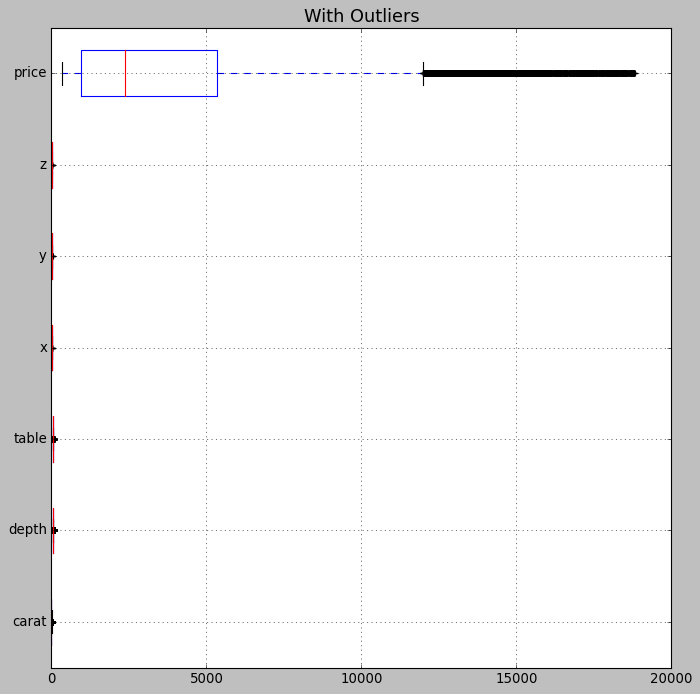

In [21]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

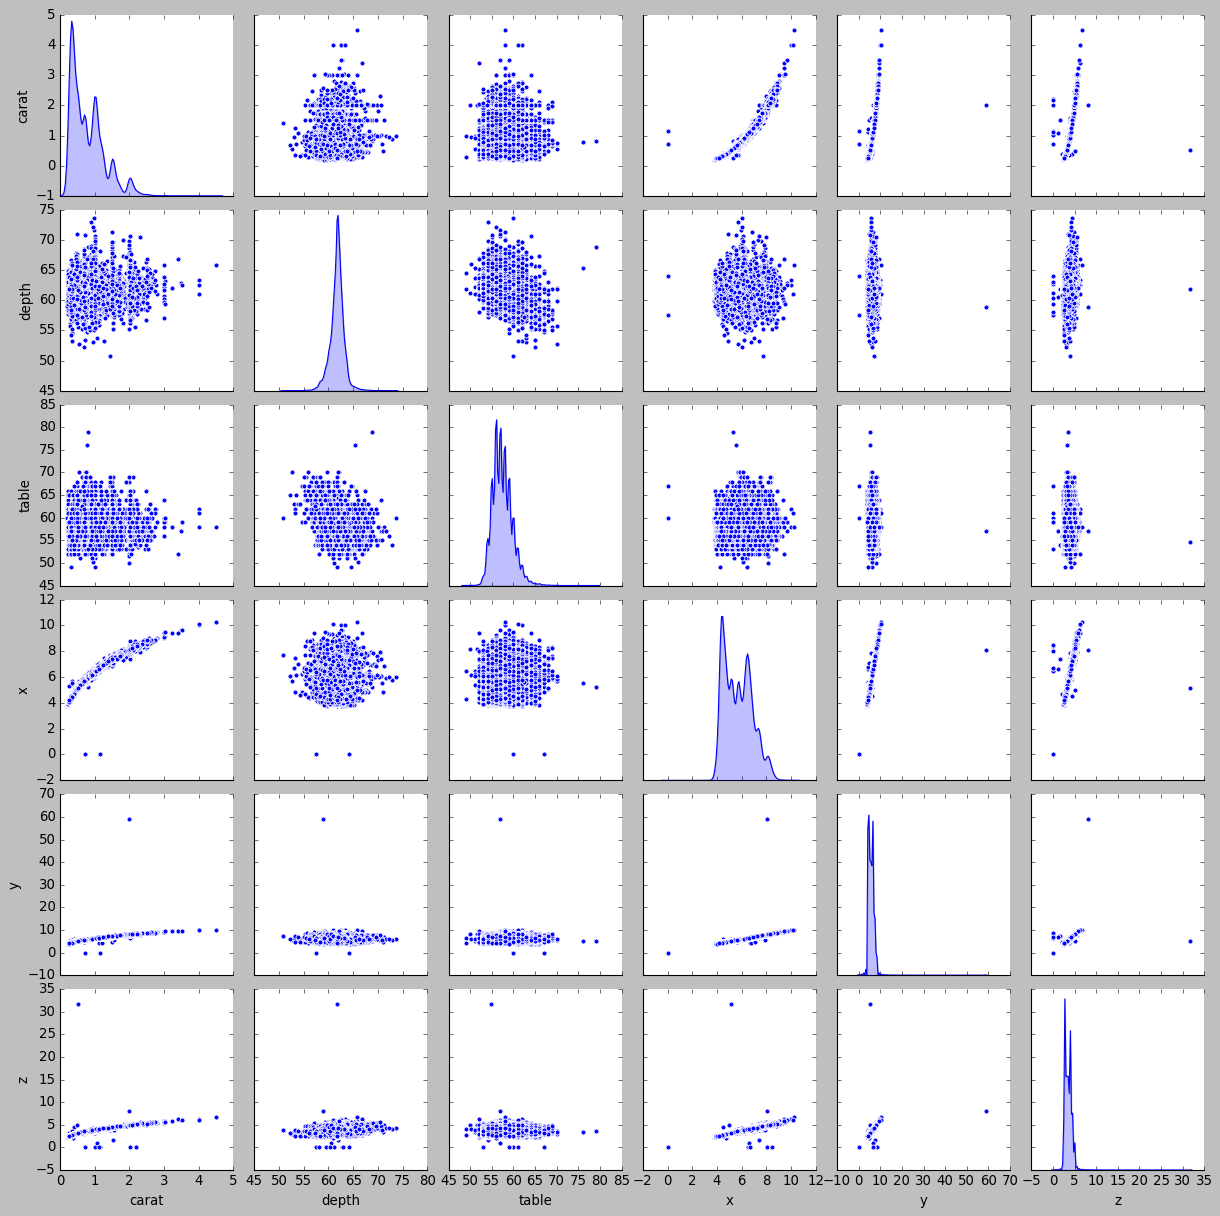

In [22]:
sns.pairplot(df.iloc[:, 0:6], diag_kind='kde');
plt.show()

In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [24]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

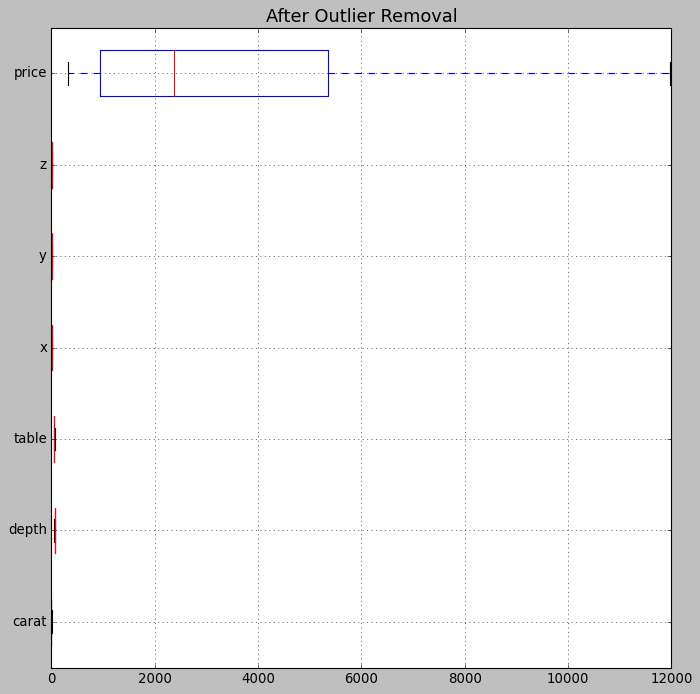

In [25]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

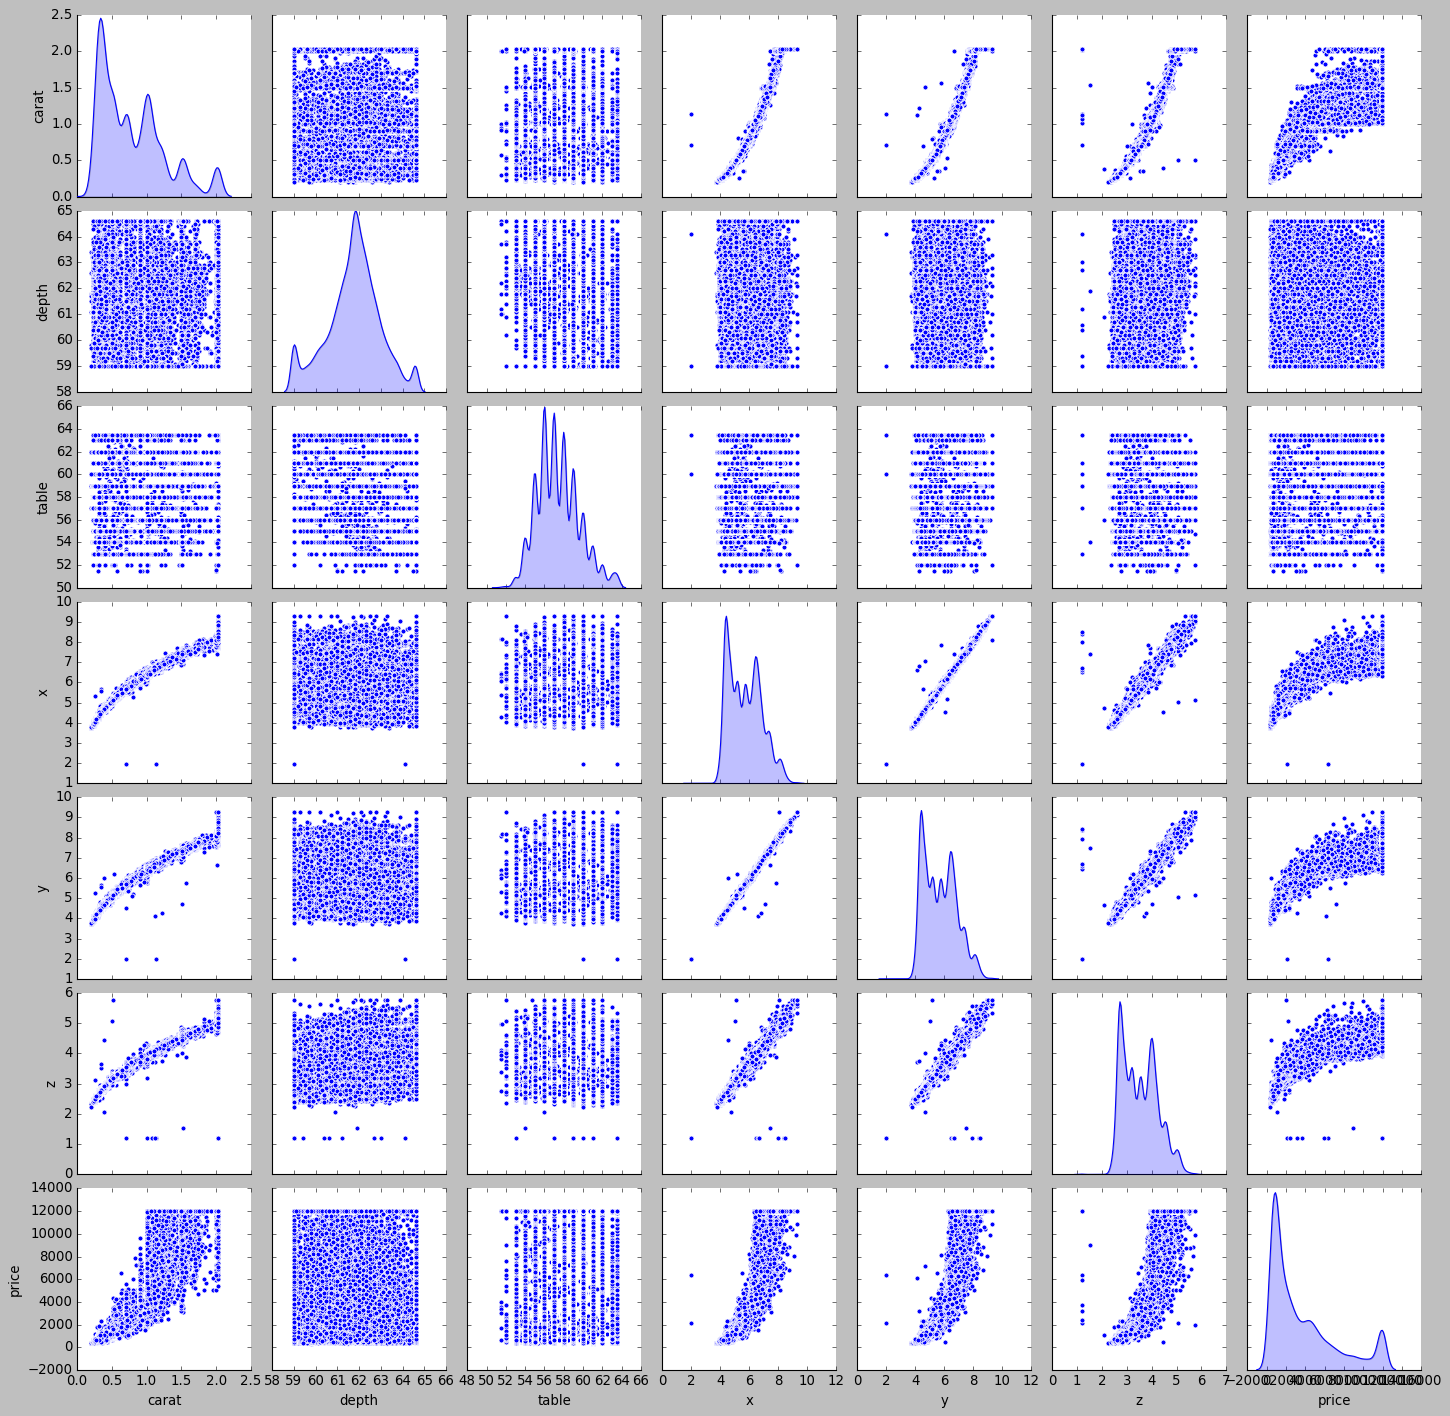

In [26]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

In [27]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [28]:
from sklearn import preprocessing

# scale all the columns of the df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [30]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train) # best fit line / best fit hyper surface

# Let us explore the coefficients for each of the independent attributes


for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2161199848933173
The coefficient for depth is -0.00524945788679223
The coefficient for table is -0.01155449151921603
The coefficient for x is -0.3864661127837536
The coefficient for y is 0.2700495128662614
The coefficient for z is -0.03298056416122042
The coefficient for cut_Good is 0.03983906169072044
The coefficient for cut_Ideal is 0.10100540799510342
The coefficient for cut_Premium is 0.0848825360927017
The coefficient for cut_Very Good is 0.07293599919692753
The coefficient for color_E is -0.020260318841904924
The coefficient for color_F is -0.028158796452670134
The coefficient for color_G is -0.050418374379384075
The coefficient for color_H is -0.08862231953540374
The coefficient for color_I is -0.11586427155956071
The coefficient for color_J is -0.12506260840794248
The coefficient for clarity_IF is 0.2064859563041437
The coefficient for clarity_SI1 is 0.31195790843890603
The coefficient for clarity_SI2 is 0.18221135399044086
The coefficient for cla

In [31]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.0009803459694918194


In [32]:
# R square on training data
regression_model.score(X_train, y_train)

0.9402044588687953

In [33]:
# R square on testing data
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)


0.9419074345242372

In [34]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.24435440092961688

In [35]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.24143024829860243

In [36]:
### Linear Regression using statsmodels

In [37]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22092,-0.980913,0.533060,1.188856,-1.171530,-1.154830,-1.115091,-0.315271,-0.818506,-0.586083,1.862451,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.922347
2275,-1.067471,-0.451751,-1.129093,-1.224808,-1.271095,-1.272969,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,-0.451699,-0.422958,1.849410,-0.270711,-0.321987,-0.833827
19165,-0.634681,0.615128,-0.201914,-0.567705,-0.609279,-0.526636,-0.315271,1.221737,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,1.761395,-0.451699,-0.422958,-0.540713,-0.270711,-0.321987,-0.719645
5029,0.663688,1.271669,-0.665503,0.710983,0.759072,0.879916,3.171873,-0.818506,-0.586083,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.094912
25384,0.490572,-0.533819,2.116035,0.719863,0.678581,0.635922,-0.315271,-0.818506,1.706244,-0.536927,...,-0.338242,-0.237668,-0.18497,-0.567732,2.213862,-0.422958,-0.540713,-0.270711,-0.321987,0.092605


In [38]:
data_train.rename(columns = {"cut_Very Good": "cut_VeryGood"}, inplace = True) 

data_test.rename(columns = {"cut_Very Good": "cut_VeryGood"}, inplace = True) 

In [39]:
expr = 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

In [40]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       0.000980
carat           1.216120
depth          -0.005249
table          -0.011554
x              -0.386466
y               0.270050
z              -0.032981
cut_Good        0.039839
cut_Ideal       0.101005
cut_Premium     0.084883
cut_VeryGood    0.072936
color_E        -0.020260
color_F        -0.028159
color_G        -0.050418
color_H        -0.088622
color_I        -0.115864
color_J        -0.125063
clarity_IF      0.206486
clarity_SI1     0.311958
clarity_SI2     0.182211
clarity_VS1     0.345786
clarity_VS2     0.366730
clarity_VVS1    0.274347
clarity_VVS2    0.316105
dtype: float64

In [41]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:29:23   Log-Likelihood:                -184.81
No. Observations:               18853   AIC:                             417.6
Df Residuals:                   18829   BIC:                             605.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0010      0.002      0.550   

In [42]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [43]:
np.sqrt(lm1.mse_resid) 

0.24451008200785526

In [44]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

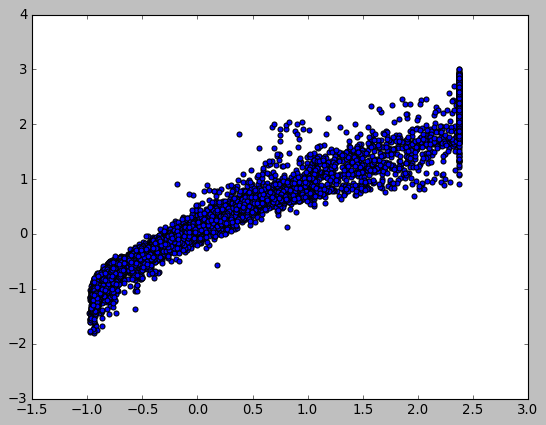

In [45]:
plt.scatter(y_test['price'], y_pred)
plt.show()